<a href="https://colab.research.google.com/github/changsksu/K-State_IMSE785/blob/main/sklearn_kmean_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

![logo](images/logo.png)
<p style='text-align: center;'> THE SPARKS FOUNDATION</p>
<h1 align="center">K-Means Clsutering on Iris Dataset</h1>
<div style="text-align: right">created<br>
-- by Mayur R. Machhi<br>
-- for The Sparks Foundation</div>
-- Sklean via iris dataset
https://github.com/mayursrt/k-means-on-iris-dataset/blob/main/Prediction%20using%20Unsupervised%20ML.ipynb
---

### Importing the libraries and the data

In [2]:
pip install seaborn

In [5]:
import pandas as pd # Pandas (version : 1.1.5)
import numpy as np # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt # Matplotlib (version :  3.3.2)
from sklearn.cluster import KMeans # Scikit Learn (version : 0.23.2)
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn-v0_8')

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the data from .csv file

First we read the data from the dataset using `read_csv` from the pandas library.

In [7]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/IMSE_Data_Science/Data/iris.csv')

Viewing the data that we imported to pandas dataframe object

In [8]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Viewing and Describing the data

Now we view the Head and Tail of the data using `head()` and `tail()` respectively.

In [9]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Checking the sample size of data - how many samples are there in the dataset using `len()`.

In [ ]:
len(data)

150

Checking the dimensions/shape of the dataset using `shape`.

In [ ]:
data.shape

(150, 5)

Viewing Column names of the dataset using `columns`

In [ ]:
data.columns

Index(['sepal_length', ' sepal_width', ' petal_length', ' petal_width',
       ' species'],
      dtype='object')

In [ ]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is sepal_length
Column number 2 is  sepal_width
Column number 3 is  petal_length
Column number 4 is  petal_width
Column number 5 is  species


So, our dataset has 5 columns named:
* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species.

View datatypes of each column in the dataset using `dtype`.

In [ ]:
data.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


Gathering Further information about the dataset using `info()`

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1    sepal_width   150 non-null    float64
 2    petal_length  150 non-null    float64
 3    petal_width   150 non-null    float64
 4    species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Describing the data as basic statistics using `describe()`

In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking the data for inconsistencies and further cleaning the data if needed.

Checking data for missing values using `isnull()`.

In [ ]:
data.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


Checking summary of missing values

In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


The 'Id' column has no relevence therefore deleting it would be better.

Deleting 'customer_id' colummn using `drop()`.

### Modelling

#### K - Means Clustering

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that the sum of squared errors is minimised between points and their respective centroids. We will use KMeans Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The distance between the centroids and the data points should be less.

First we need to check the data for any missing values as it can ruin our model.

In [ ]:
data.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


We conclude that we don't have any missing values therefore we can go forward and start the clustering procedure.

We will now view and select the data that we need for clustering.

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
#please note that the column name has a space in front of the name
data[' species'].head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


Checking the value count of the target column i.e. 'Species' using `value_counts()`

In [13]:
data[' species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Splitting into Training and Target data

Target Data

In [14]:
target_data = data.iloc[:,4]
target_data.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


Training data

In [15]:
clustering_data = data.iloc[:,[0,1,2,3]]
clustering_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now, we need to visualize the data which we are going to use for the clustering.
This will give us a fair idea about the data we're working on.

In [16]:
# note that sepal_length does not have a space but the sepal_width has a space
data[' sepal_width'].head()

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


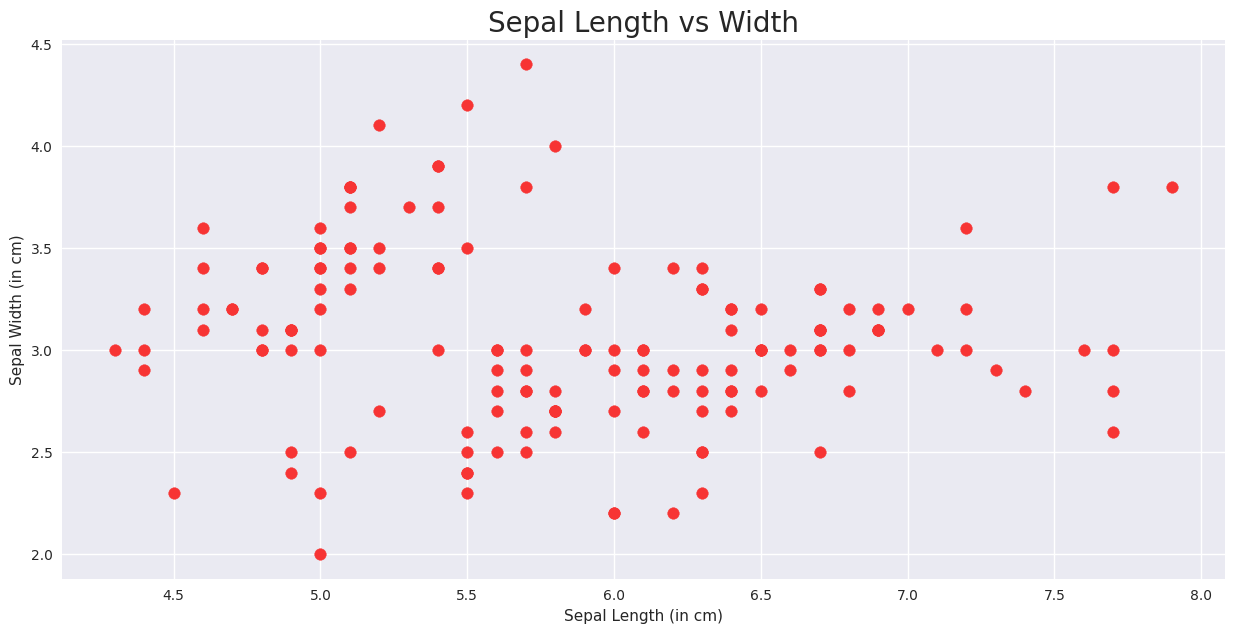

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=data['sepal_length'],y=data[' sepal_width'], s=70, color='#f73434', edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize = 20)
plt.show()

This gives us a fair Idea and patterns about some of the data.

### Determining No. of Clusters Required

**The Elbow Method**

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

![formula](images\formula.png)

where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

With this simple line of code we get all the inertia value or the within the cluster sum of square.

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([680.8244    , 152.36870648,  78.94084143,  57.31787321,
        49.86865426,  42.32651111,  37.56018788,  32.8474686 ,
        31.86848302,  26.73078314])

Inertia can be recognized as a measure of how internally coherent clusters are.

Now, we visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

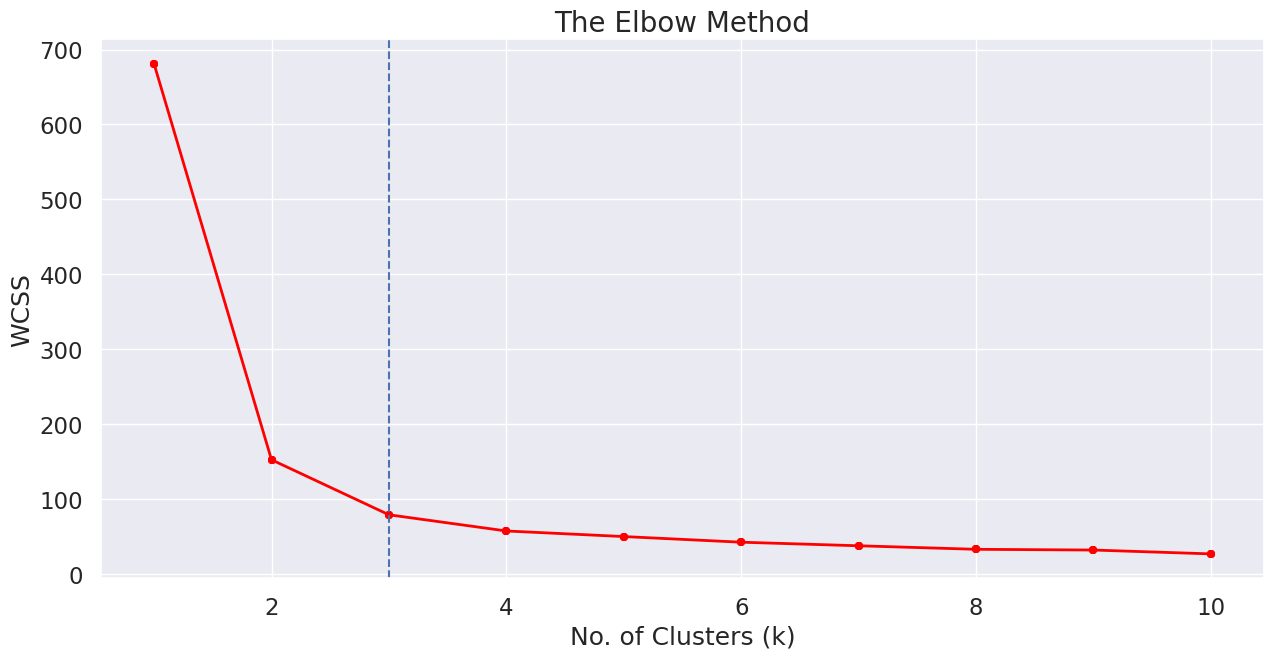

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

It is clear, that the optimal number of clusters for our data are 3, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 3, it would be difficult to visualize the elbow if we choose the higher range.

### Clustering

Now we will build the model for creating clusters from the dataset.
We will use `n_clusters = 3` i.e. 3 clusters as we have determined by the elbow method, which would be optimal for our dataset.

init='k-means++':
This determines how the initial centroids are selected before the algorithm starts.

'k-means++' is a smart initialization method.

It chooses initial cluster centers in a way that speeds up convergence and usually leads to better final clustering compared to random initialization.

It works by:

  Picking the first centroid randomly from the data.

  Picking the next centroids with a probability proportional to their distance from already chosen centroids (farther points are more likely to be chosen).


Our data set is for  unsupervised learning therefore we will use `fit_predict()`
Suppose we were working with  supervised learning data set we would use `fit_tranform()`

In [20]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=3)

Now that we have the clusters created, we will enter them into a different column

In [21]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


We can also get the centroids of the clusters by the `cluster_centers_` attribute of KMeans algorithm.

In [22]:
kms.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Now we have all the data we need, we just need to plot the data. We will plot the data using scatterplot which will allow us to observe different clusters in different colours.

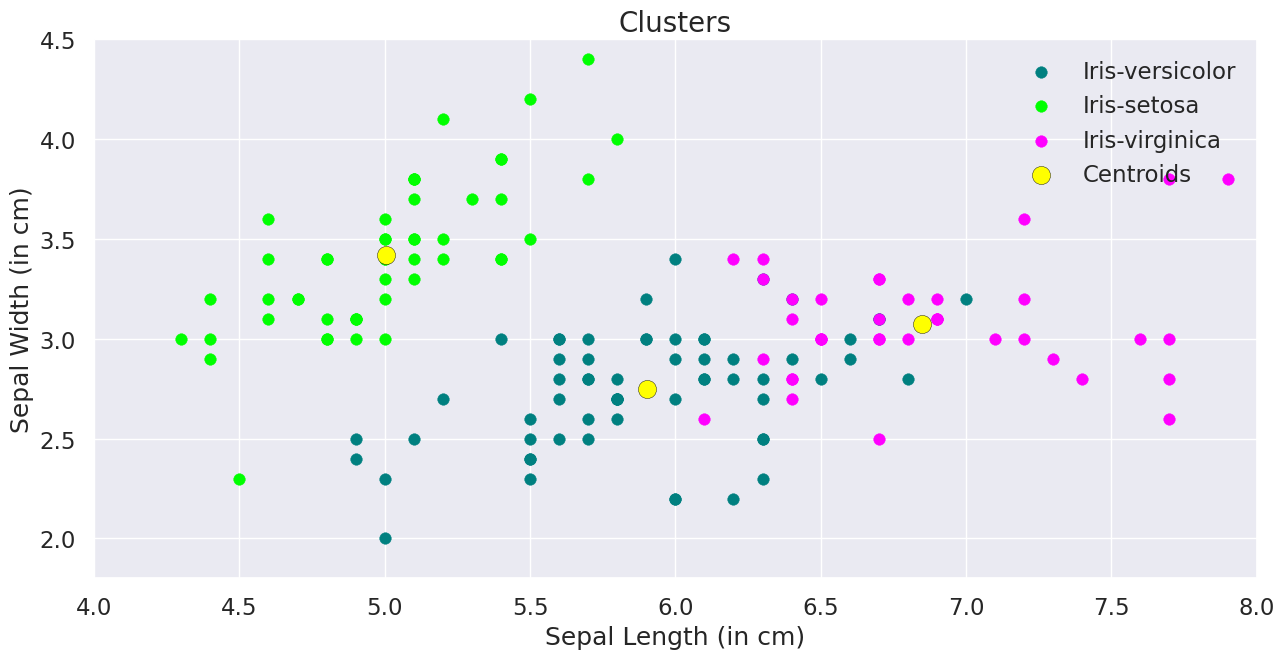

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 0][' sepal_width'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 1][' sepal_width'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 2][' sepal_width'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

### Analysis

Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the
data.
Kmeans has divided the dataset into 3 clusters based on Annual income and the spending scores of the individual customers.
The following clusters are created by the model,
1. Iris-versicolor
1. Iris-setosa
1. Iris-virginica

#### 1. Iris-versicolor

![versicolor](images/versicolor.jpg)
Iris versicolor is a flowering herbaceous perennial plant, growing 10–80 cm (4–31 in) high. It tends to form large clumps from thick, creeping rhizomes. The unwinged, erect stems generally have basal leaves that are more than 1 cm (1⁄2 in) wide. Leaves are folded on the midribs so that they form an overlapping flat fan. The well developed blue flower has 6 petals and sepals spread out nearly flat and have two forms. The longer sepals are hairless and have a greenish-yellow blotch at their base. The inferior ovary is bluntly angled. Flowers are usually light to deep blue (purple and violet are not uncommon) and bloom during May to July. Fruit is a 3-celled, bluntly angled capsule. The large seeds can be observed floating in fall.

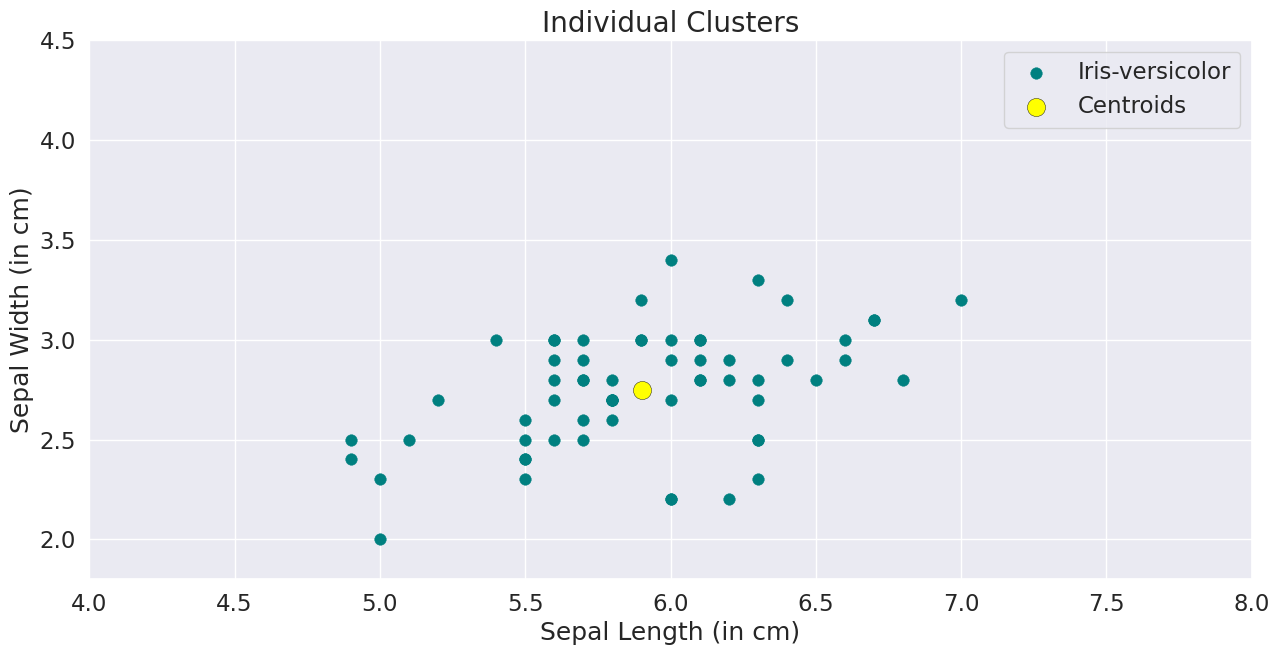

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 0][' sepal_width'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=kms.cluster_centers_[0, 0], y=kms.cluster_centers_[0, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Individual Clusters', fontsize = 20)
plt.show()

#### 2. Iris-setosa

![setosa](images/setosa.jpg)
Iris setosa is similar in form to a miniature Japanese iris, or a dwarf version of Iris sibirica but a shorter lived version.
The shallowly rooted, large, branching rhizomes spread over time to create large clumps. The rhizomes are grey-brown, thick, and are covered with old (maroon-brown) fibrous leaf remains (of last seasons leaves).
It has branched stems, which are very variable in height, ranging from 10 cm (5 inches) up to 1 m (3 ft) tall. The larger plants can grow beyond the height of the leaves. The roundish stems are between 1.5–9 cm in diameter with 1 to 3 branches.
Iris setosa has mid-green leaves, which are grass-like, and lanceolate (sword-shaped). They have a purplish tinged base and the leaves can measure 30–60 cm (12–24 in) long by 0.8–2.5 cm wide.
The plant has 3–4 flowers per stem (between 6 and 13 for the whole plant, in groups of 3,) and it blooms between June and July.
The large flowers are between 5–8 cm (3–6 in) across, usually 7–8 cm, and come in a range of shades of blue, which can depend on the location. and range from violet, purple-blue, violet-blue, blue, to lavender. Very occasionally, there are pink or white forms.

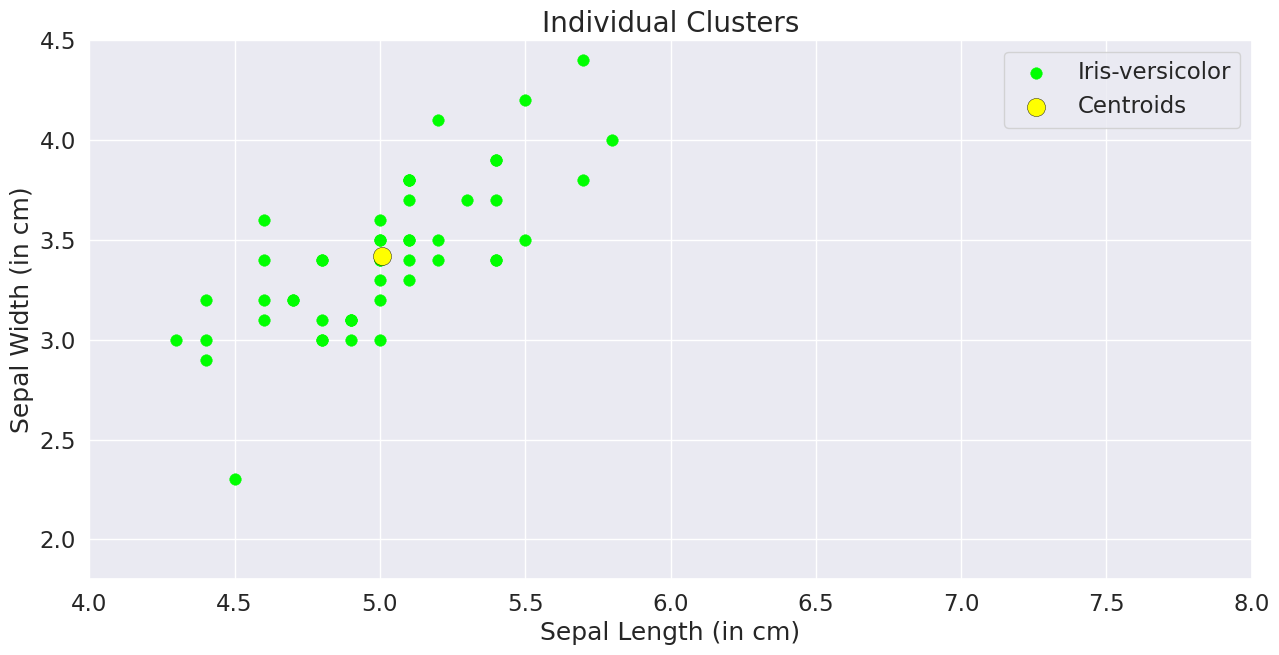

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 1][' sepal_width'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-versicolor')


plt.scatter(x=kms.cluster_centers_[1, 0], y=kms.cluster_centers_[1, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Individual Clusters', fontsize = 20)
plt.show()

#### 3. Iris-virginica

![virginica](images/virginica.jpg)
Iris virginica is a perennial plant. The plant has 2 to 4 erect or arching, bright green, lance-shaped leaves that are flattened into one plane at the base. Leaves are 1–3 cm (1⁄2–1 1⁄4 in) wide and are sometimes longer than the flower stalk. The fleshy roots (1–2 cm or 1⁄2–3⁄4 in in diameter) are rhizomes that spread underground. Pale brown, variably shaped seeds are born in three-part fruit capsules (3–6 cm or 1 1⁄4–2 1⁄4 in long, 1–2 cm or 1⁄2–3⁄4 in wide).
The slightly fragrant flowers (4 cm or 1 1⁄2 in long, 7 cm or 2 3⁄4 in across) consist of 3 horizontal sepals, or "falls", and 3 erect petals. The petals and sepals can vary in color from dark-violet to pinkish-white. The sepals have a splash of yellow to yellow-orange at the crest. Each plant has 2 to 6 flowers that bloom from April to May upon a single, erect, 30–90 cm (12–35 in) tall stalk. The stalk is sometimes branched and has a slight zigzag appearance.

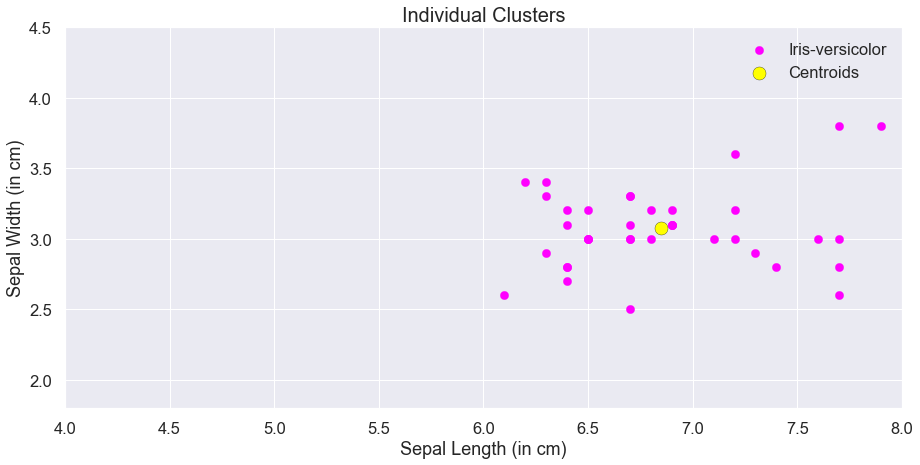

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-versicolor')


plt.scatter(x=kms.cluster_centers_[2, 0], y=kms.cluster_centers_[2, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Individual Clusters', fontsize = 20)
plt.show()